# Exploring our DOS environment

First we import our extension and ask it to "pop out."  This will put the dosbox widget itself in a different tab in Jupyterlab, and it'll also add a browser on the left had side for the files in its temporary filesystem.

In [1]:
import jupyterlab_dosbox, pooch
db = jupyterlab_dosbox.DosboxModel()
db.pop_out()

Now, let's send over a zip file from the Archive of one of my favorite DOS games, McMurphy's Mansion.

In [2]:
URL = "https://archive.org/download/msdos_McMurphys_Mansion_1984/McMurphys_Mansion_1984.zip"
SHA256SUM = "ce54f7a42d6513010d6c737465b4ef59c09634de2db3f0b1b0f66963ef3cb98b"
fn = pooch.retrieve(URL, SHA256SUM)
db.send_zip(fn)

Sending buffer of length 8.671e+04 bytes


Now let's make it play the game!  You can also browse the file explorer on the left to see what was just unzipped.

In [3]:
db.send_command("cd mcmurphy")
db.send_command("mcmurphy")

We can ask Dosbox for a coredump of the main memory.  This should be a snapshot in time when it was accessed; it'll have register info as well as pointers to different areas on the stack.

In [4]:
db.coredump(full_memory=True)

Let's get a view of it as a `uint8` array...

In [5]:
cdump = db.last_coredump

And for good measure, let's take a screenshot.

In [6]:
db.screenshot()

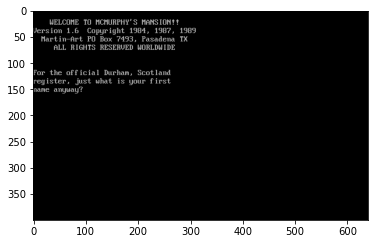

In [7]:
import matplotlib.pyplot as plt
plt.imshow(db.last_screenshot)

We can look at the registers as well to see what we have, and then we can take it from there!

In [8]:
db._last_registerdump

{'memBase': 26837272,
 'ip': 9796,
 'flags': 29254,
 'registers': {'ax': 12909,
  'cx': 12909,
  'dx': 12909,
  'sp': 12909,
  'bp': 1543,
  'si': 1543,
  'di': 1543},
 'segments_physical': {'es': 753664,
  'cs': 753664,
  'ss': 753664,
  'ds': 753664,
  'fs': 6688,
  'gs': 6688},
 'segments_values': {'es': 47104,
  'cs': 47104,
  'ss': 418,
  'ds': 418,
  'fs': 7652,
  'gs': 7652}}